# EMA 5586 - DataCamp Assignment 3

Complete each of the steps below and submit this by **February 20, 2025**.

In [110]:
# Loading all of necessary packages here

suppressPackageStartupMessages(library(tidyverse))

library(readr)
library(ggplot2)
library(tidyverse)
library(plyr)
library(dplyr)
library(readr)
library(scales)
library(reshape2)
install.packages("readxl")
library(readr)
library(readxl)

The following package(s) will be installed:
- readxl [1.4.3]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing readxl ...                         OK [linked from cache]


## Task 1
Assume you are working as an R&D Engineer for a silicon photovoltaic (PV) cell manufacturing company and working with a team aimed at developing a plasma-enhanced chemical vapor deposition (PECVD) process to deposit a silicon nitride ($SiN_{x}$) antireflection coating (ARC) for your passivated emitter and rear cell (PERC) cells. Your job is to help characterize the various process and select the best option.

A process engineer builds the following data table, showing the PECVD process parameters selected for five different groups. The deposition time and temperature are fixed at 375C and 12 minutes, respectively. The silane ($SiH_{4}$) to ammonia ($NH_{3}$) precursor gas ratio is varied from 30% to 70%. This is known to have a large impact on the resulting refractive index.

In [111]:
# Read in CSV file for the PECVD process
PECVD_processes <- read_csv('Data_Antireflection_Coating/PECVD_Processes.csv', show_col_types = FALSE)

# Convert into a dataframe
PECVD_processes_df <- data.frame(PECVD_processes)

# View the dataframe
PECVD_processes_df

Batch.ID,Temperature..C.,SiH4.NH4.ratio,Time..minutes.
<dbl>,<dbl>,<dbl>,<dbl>
21,375,30,12
22,375,40,12
23,375,50,12
24,375,60,12
25,375,70,12


## Responses to Task 1

Provide your answers to the questions in the text boxes below with a brief explanation, if and when appropriate. Also, provide units where appropriate.

## Q1.1
You are tasked with first measuring the film thickness and complex refractive index, particularly the real component at a wavelength of 600 nm ($n$ at $\lambda$ = 600 nm). What measurement technique would you use to determine the film thickness and refractive index of these deposited films? Explain why you selected this technique.

## Response to Q1.1

_Answer_

## Q1.2
After performing the measurements, you obtain the following film thicknesses and $n$($\lambda$ = 600 nm) for each group (see the table below read from the attached CSV file). Here, the mean values are reported for each group with the standard deviation represented at the (+/-) value. What process yields the most optimal refractive index, assuming air as the incident media and silicon as the underlying absorber which has a $n$($\lambda$ = 600 nm) of ~4.0? Explain how you calculated this.

In [112]:
# Read in a CSV file of the observations from the measurements
thickness_refractive_index <- read_csv('Data_Antireflection_Coating/Thickness_Refractive_Index.csv', show_col_types = FALSE)

# Convert into a dataframe
thickness_refractive_index_df <- data.frame(thickness_refractive_index)

# View the dataframe
thickness_refractive_index_df


Batch.ID,Temperature..C.,SiH4.NH4.ratio,Time..minutes.,Film.Thickness..nm.,Refractive.Index
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
21,375,30,12,77 +/- 4,1.82 +/- 0.07
22,375,40,12,75 +/- 3,1.93 +/- 0.06
23,375,50,12,78 +/- 6,1.99 +/- 0.04
24,375,60,12,77 +/- 3,2.01 +/- 0.03
25,375,70,12,74 +/- 5,2.13 +/- 0.06


## Response to Q1.2

_Answer_

## Q1.3
Using [OPAL 2](https://www2.pvlighthouse.com.au/calculators/opal%202/opal%202.aspx), calculate the expected short-circuit current density ($J_{SC}$) of your ARC. To do this, use all of the default values in the calculator, but:

- Remove the silicon oxide film
- Select appropriate $SiN_{x}$ material based on the closest refractive index from the drop down menu
- Change the film thickness to match your target thickness

Now, once you have entered that and the calculator updates, scroll to the bottom and export the RAT data in an Excel format. Then, replace the PVL_RAT.xlsx file currently in the Data_Antireflection_Coating folder with the file you just exported from OPAL 2. Then, run the code to determine the $J_{SC}$ and visualize the plots for the AM1.5G photon flux and optical quantum efficiency (i.e., 1 - _R_) versus $\lambda$. Provide your calculated $J_{SC}$. 

![OPAL_2](Documents/OPAL_2_Download_Reflection.png)


[1] "The short-circuit current density is 22.6 mA per cm squared."


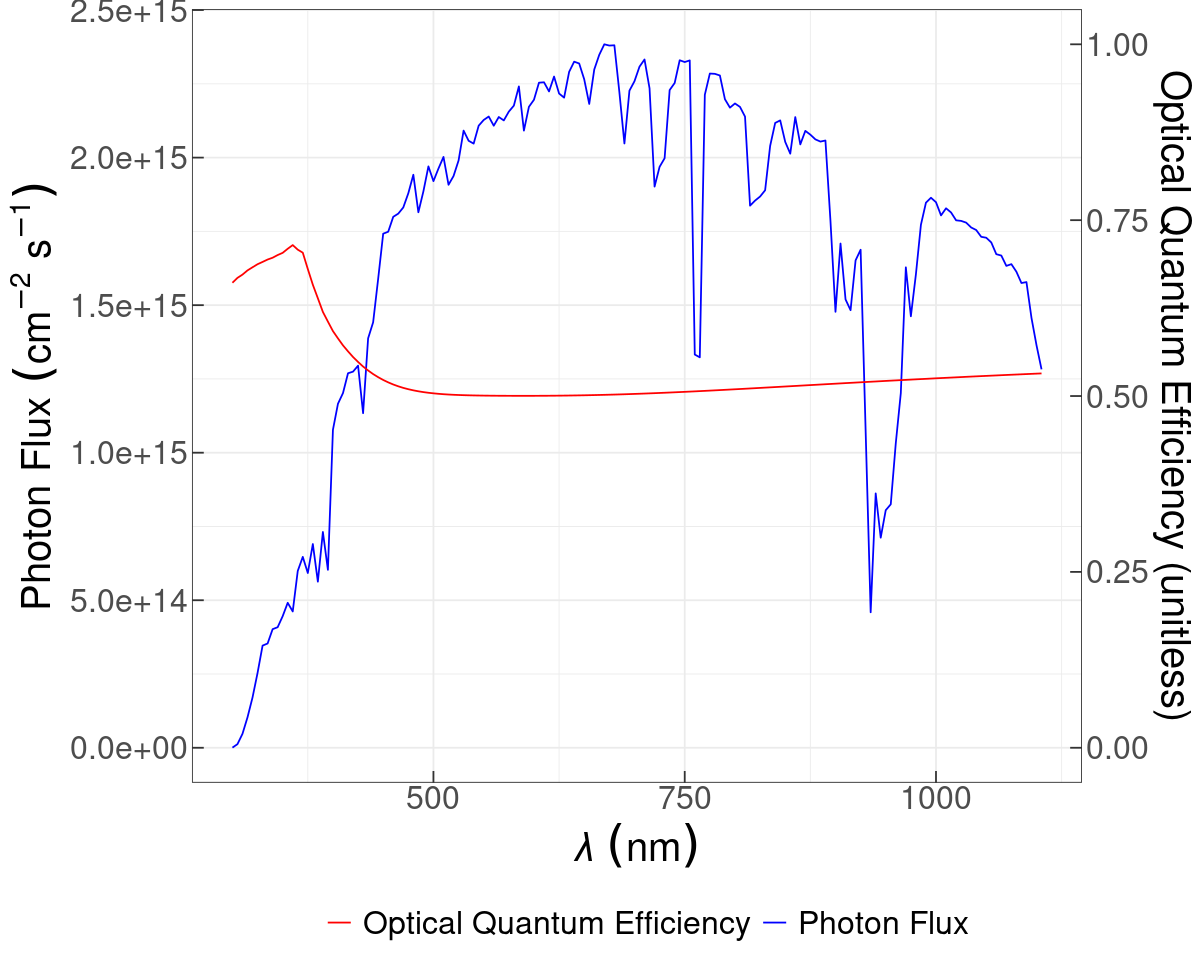

In [130]:
# Constants needed in calculations

	# Fundamental charge of an electron in units of coulombs - needed to calculate Jsc 
	electron_charge <- 1.602176634E-19

	# Silicon bandgap is needed to define the absorption edge, you will integrate/sum the product of the AM1.5G photon flux and the optical quantum efficiency up to this point
	# Bandgap in energy units of eV
	silicon_bandgap_eV <- 1.12
	# Bandgap expressed as a wavelength in units of nm
	silicon_bandgap_nm <- 1240 / silicon_bandgap_eV

# Read in files and create dataframes

	# Read in the photon flux for AM1.5G from the CSV file provided
	am1_5g <- read_csv('Data_Passivation/AM1_5G.csv', show_col_types = FALSE)

	# Create a dataframe for the AM1.5G photon flux versus wavelength
	am1_5g_df <- data.frame(am1_5g)

	# Read in the Excel file that you exported from OPAL 2 featuring reflection versus wavelength
	# You can define the optical quantum efficiency as (1 - Reflection), since the Reflection represents the fractional loss at each wavelength
	OPAL_2_reflection <- read_excel('Data_Antireflection_Coating/PVL_RAT.xlsx')

	# Create a dataframe for reflection versus wavelength
	OPAL_2_reflection_df <- data.frame(OPAL_2_reflection)

	# head(OPAL_2_reflection_df)

# Join your the two dataframes so you can take the product ofthe AM1.5G photon flux and the optical quantum efficiency

	# Perform inner join on am1_5g_df and reflectance on wavelength_nm and Wavelength_nm
	merged_am1_5g_OPAL_2_reflection_df <- merge(am1_5g_df, OPAL_2_reflection_df, by.x = "wavelength_nm", by.y = "Wavelength..nm.")


	# Unit conversion
	A_to_mA <- 1000

	# Here the Jsc is calculated at each wavelength. Since photon flux is given per cm^2 per s, Jsc is given here in units of A / cm^2. We'd like them in mA / cm^2, so we multiply this by 1,000.
	Jsc_per_wavelength_df <- merged_am1_5g_OPAL_2_reflection_df %>% 
		mutate(optical_QE = 1 - Reflection) %>%
		mutate(Jsc_per_wavelength_mA_per_cm2 = photon_flux_cm2_per_s * (optical_QE) * electron_charge * A_to_mA) %>%
	  filter(wavelength_nm <= silicon_bandgap_nm)

	# Show the first few rows of this dataframe
	# head(Jsc_per_wavelength_df)

	# Take the sum of the product 
	Jsc_max_optical_mA_per_cm2  <- sum(Jsc_per_wavelength_df$Jsc_per_wavelength_mA_per_cm2)

	# Print the final Jsc
	print(paste("The short-circuit current density is", round(Jsc_max_optical_mA_per_cm2, digits = 1), "mA per cm squared."))
	
# Create a plot with two y-axes, one with photon flux and one with the optical quantum efficiency
	ggplot(Jsc_per_wavelength_df, aes(x = wavelength_nm)) +
	  geom_line(aes(y = photon_flux_cm2_per_s, color = "Photon Flux")) +
	  geom_line(aes(y = optical_QE * max(photon_flux_cm2_per_s), color = "Optical Quantum Efficiency")) +
	  scale_y_continuous(
		name = expression(Photon~Flux~(cm^{-2}~s^{-1})),
		sec.axis = sec_axis(~ . / max(Jsc_per_wavelength_df$photon_flux_cm2_per_s), name = "Optical Quantum Efficiency (unitless)")
	  ) +
	  scale_color_manual(
		name = " ",
		values = c("Optical Quantum Efficiency" = "red", "Photon Flux" = "blue"),
		position = "bottom"
	  ) +
	  labs(x = expression(italic(λ)~(nm))) +
	  theme(
		axis.title.y.left = element_text(color = "blue"),
		axis.text.y.left = element_text(color = "blue"),
		axis.title.y.right = element_text(color = "red"),
		axis.text.y.right = element_text(color = "red")  
	  ) +
	  theme_bw() +
	  theme(text = element_text(size = 24)) +
	  theme(axis.ticks.length = unit(-0.25, "cm")) +
	  theme(legend.position = "bottom")

## Response to Q1.3

_What is your calculated short-circuit current density? Make sure to include units._

## Q1.4

Provide a clear explanation of how you would calculate the total amount of current density you are losing to reflection loss? Hint: You have everything you would need to do this in the data already provided.

## Response to Q1.4

_Answer_

## Q1.5
Assuming your targeted PV cell has a $J_{0}$ of 200 $fA/cm^{2}$, a $R_{S}$ of 0.5 $\Omega-cm^{2}$, and ideality factor of 1, what would the resulting efficiency of this PV cell be? Explain how you determined this value.

## Response to Q1.5

_Answer_

## Task 2
Now, let's assume as the R&D Engineer, you are now tasked with deciding on whether or not you should add an alternative, very thin passivation layer between your $SiN_{x}$ ARC and the front surface of your silicon abosrber in the PERC cell. Your current PERC cell features a boron-doped wafer with a doping concentration of $10^{16}~ (cm)^{-3}$ and a phosphorus diffused carrier-selective homojunction with a sheet resistance of 117 $\Omega / sq.$ 

This aligns perfectly with the default settings in [ENDA 2](https://www2.pvlighthouse.com.au/calculators/EDNA%202/EDNA%202.aspx) from PV Lighthouse. Keeping everything else the same, the possible passivation layers you have access to all have comparable interface defect densities, but different in terms of their fixed charge ($Q_{f}$) polarity and magnitude. Therefore, in EDNA 2, you can calculate the surface saturation current density ($J_{0E}$ in the calculator and $J_{0f}$ in the course slides) of each configuration by keeping everything the same, except the following fixed charge value ($Q_{f}$). 

### Material A
- Current PECVD $SiN_{x}$ ARC process 
- $Q_{f,A} = +1 \cdot 10^{12} ~ cm^{-2}$

### Material B
- Alternative PECVD $SiN_{x}$ process
- $Q_{f,B} = +5 \cdot 10^{12} ~ cm^{-2}$

### Material C
- Alternative thermal atomic layer deposition (ALD) $Al_{2}O_{3}$ process
- $Q_{f,C} = -1 \cdot 10^{12} ~ cm^{-2}$

### Material D
- Alternative plasma-assisted ALD (PAALD) $Al_{2}O_{3}$ process
- $Q_{f,D} = -5 \cdot 10^{12} ~ cm^{-2}$

### Material E
- Thermal $SiO_{2}$ process
- $Q_{f,E} = -1 \cdot 10^{11} ~ cm^{-2}$

## Q2.1
Use EDNA 2 to calculate the $J_{0f}$ for each option and provide a rank ordering of each option from best to worst. Then, provide a detailed explanation of the reasoning behind your selections.

## Response to Q2.1
1. First choice:
2. Second choice:
3. Third choice:
4. Fourth choice:
5. Last choice:

Explanation your selection process:


## Q2.2

Now, consider the same targeted PV cell from Q1.5 with a total $J_{0}$ of 200 $fA/cm^{2}$, a $R_{S}$ of 0.5 $\Omega-cm^{2}$, an ideality factor of 1, and the $J_{SC}$ you calculated in Q1.3. Now, consider we can break down the total $J_{0}$ into the following:

- Front surface: $J_{0f} = 50~fA/cm^{2}$
- Bulk: $J_{0b} = 50~fA/cm^{2}$
- Rear surface: $J_{0r} = 100~fA/cm^{2}$

And let's assume:

$J_{0}$ = $J_{0f}$ + $J_{0b}$ + $J_{0r}$

Now, calculate the estimated efficiency for each passivation option using the assumptions above and calculations from Q2.1. Also, explain how you calculated these.

## Response to Q2.2

Efficiency values in (%)
1. Material A:
2. Material B:
3. Material C:
4. Material D:
5. Material E:

Explanation how you calculated these efficiency values:

## Q2.3

Now your company asks you what part of the PV cell you should focus on next. Based on the information you have, what would you select and why.

- Lower the optical losses by improving the front antireflection coating more
- Improve the front surface passivation even more
- Improve the quality of the silicon wafers, i.e., the bulk absorber
- Reduce the rear surface recombination losses

## Response to Q2.4

Your selection:

Explanation of the reasoning behind your selection: 

## Task 3

This task relates directly to your research report that you will have due for this class. Here, you need to find at least 25 peer-reviewed journal articles related to the PV cell technology you selected for your report. The articles should meet the following two constraints.

- The articles should report on new experimental research related to PV cells and/or modules and include measured illuminated current-voltage results and performance parameters. So, no review articles here, but those will be useful for other purposes later.
- The article should feature results on the PV cell technology you selected. It is OK if it also features other groups of cells, but it at least needs to include some results specific to your selected cell type.
- The articles should be from peer-reviewed journal articles (i.e., not conference proceedings or unrefereed reports).

Note, you do not need to read each article in a ton of detail **at this point in time**. Instead, do some searching in Google Scholar, scan the abstracts and also the experimental sections and the results sections. Just make sure the articles include sufficient information about the PV cells/modules and that you will be able to extract the required performance parameters obtained in the work (e.g., efficiency, short-circuit current density or short-circuit current and cell area, open-circuit voltage for cells or open-circuit voltage per cell, fill factor).

When searching for relevant publications, I would highly recommend using [Google Scholar](https://scholar.google.com/) and the following steps:

- **Search**: Try a relevant search query
- **Scan and flag**: First scan for the relevant titles and when you find ones that are relevant, read the abstract and scan the figures to see if the article is worth saving for a deeper read. To make this decision, consider both how relevant it is to your topic and whether it includes the information you would like to include in your summary table. There are a variety of ways to do this flagging process, but one I would recommend would be logging into Google Scholar and using the My library functionality. With that function, you can create a label (e.g., 2025 - EMA 5586) and then flag the papers that way. Later, when you read them in more detail, you can import them into your preferred reference manager (e.g., Zotero).

![Google_Scholar](Documents/Google_Scholar_My_Library.png)

- **Repeat**: Now try a different search query and repeat the process. Again, speed is key at this stage. If you spend no more than 30 seconds on average scanning through each article, then you can go through 120 papers in an hour. In reality, you’ll be ignoring many of them based on the title along which only takes a few seconds, so you can really scan much more than that in an hour.

AI-based tools also exists to assist with your literature review. However, the value of them currently is unclear. Inciteful is one that I’ve found to be somewhat helpful because it uses graph networks to show the relationship between different publications. Many others exist, and I’m sure in the future these will become invaluable tools to support literature reviews.

If you are using My library Google Scholar, when you export as a .bib, your browser will typically just display the BibTeX references. You can just copy that text, put it into a text editor and save it as a EMA_5586_YourLastName.bib.

**Q3.1** Once you have at least 25 articles, create a .bib file featuring all of them of using the instructions provided. Add this .bib file to the References folder in this notebook.

**Q3.2** Collect all of the PDFs for these articles, preferably in a single folder. Then, add all of these PDFs to the Documents folder in this notebook. 

## Response to Q3.1

Confirm the .bib file with at least 25 references is in the References folder.

## Response to Q3.2

Confirm the PDFs files for at least 25 references are in the References folder.

## Submission

Click the share button in this data notebook and add the instructor's email address: kristopher.davis@ucf.edu

Make sure to save a copy of your notebook in a place where you can retrieve it later, if necessary. You can do this by clicking File and then Download.